In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv as csv
import os
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import keras
from keras.utils.np_utils import to_categorical
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

C:\Users\ALEXANDROS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\ALEXANDROS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print('--------load train & test file------')
train_dataset = pd.read_csv('input/train.csv')
test_dataset = pd.read_csv('input/test.csv')
print(f'train dataset: {str(train_dataset.shape)}, test dataset {str(test_dataset.shape)}')

--------load train & test file------
train dataset: (891, 12), test dataset (418, 11)


In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
print('----train dataset column types information-------')
dtype_df = train_dataset.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
print(dtype_df)
print(dtype_df.groupby("Column Type").aggregate('count').reset_index())

print('------problems with train & test file------')
if train_dataset.PassengerId.nunique() == train_dataset.shape[0]:
    print('Unique ID for each passenger.')
else:
    print('Problem with IDs!')

if len(np.intersect1d(train_dataset.PassengerId.values, test_dataset.PassengerId.values))== 0:
    print('Train and test sets are distinct.')
else:
    print('Train and test sets are not distinct.')

if train_dataset.count().min() == train_dataset.shape[0] and test_dataset.count().min() == test_dataset.shape[0] :
    print('No missing values.')
elif test_dataset.count().min() == test_dataset.shape[0] and train_dataset.count().min() != train_dataset.shape[0]:
    print('Training set has mising values.')  
    trainSetHasNan = True
elif train_dataset.count().min() == train_dataset.shape[0] and test_dataset.count().min() != test_dataset.shape[0]:
    print('Test set has mising values.') 
    testSetHasNan = True
else:
    print('There are missing values on both sets.')
    datasetsHaveNan = True

----train dataset column types information-------
          Count Column Type
0   PassengerId       int64
1      Survived       int64
2        Pclass       int64
3          Name      object
4           Sex      object
5           Age     float64
6         SibSp       int64
7         Parch       int64
8        Ticket      object
9          Fare     float64
10        Cabin      object
11     Embarked      object
  Column Type  Count
0       int64      5
1     float64      2
2      object      5
------problems with train & test file------
Unique ID for each passenger.
Train and test sets are distinct.
There are missing values on both sets.


# Exploratory Data Analysis

In [9]:
print("--------Exploratory Data Analysis------")

print("Missing values in both data sets:")
nans = pd.concat([train_dataset.isnull().sum(), test_dataset.isnull().sum()],
                 axis=1,
                 keys=['Training Set', 'Test Set'])
print(nans[nans.sum(axis=1)>0].astype(int))

train_nan = train_dataset.isnull().sum()
train_nan_col = list(train_nan[train_nan!=0].index)

directory = "./figures"
if not os.path.exists(directory):
    os.makedirs(directory)



--------Exploratory Data Analysis------
Missing values in both data sets:
          Training Set  Test Set
Age                177        86
Cabin              687       327
Embarked             2         0
Fare                 0         1


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


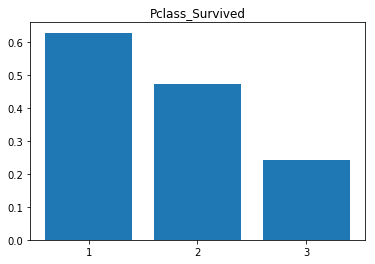

In [10]:
pclass_survived = train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
print(pclass_survived.sort_values(by='Survived', ascending=False))
plt.bar(pclass_survived['Pclass'], pclass_survived['Survived'])
plt.title("Pclass_Survived")
plt.xticks(range(1,len(pclass_survived['Pclass'])+1), pclass_survived['Pclass'])
plt.savefig(directory+"/Pclass_Survived")
plt.show()
plt.clf()

      Sex  Survived
0  female  0.742038
1    male  0.188908


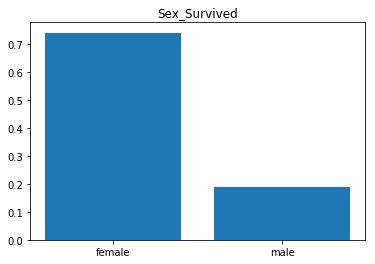

In [11]:
sex_survived = train_dataset[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
print(sex_survived.sort_values(by='Survived', ascending=False))
plt.bar(sex_survived['Sex'], sex_survived['Survived'])
plt.title("Sex_Survived")
plt.xticks(range(len(sex_survived['Sex'])), sex_survived['Sex'])
plt.savefig(directory+"/Sex_Survived")
plt.show()
plt.clf()

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


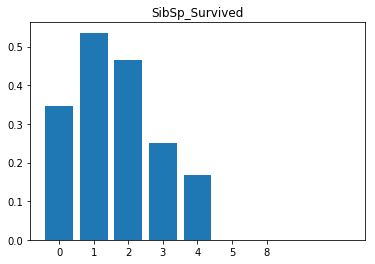

In [12]:
sibSp_survived = train_dataset[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()
print(sibSp_survived.sort_values(by='Survived', ascending=False))
plt.bar(sibSp_survived['SibSp'], sibSp_survived['Survived'])
plt.title("SibSp_Survived")
plt.xticks(range(len(sibSp_survived['SibSp'])), sibSp_survived['SibSp'])
plt.savefig(directory+"/SibSp_Survived")
plt.show()
plt.clf()

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


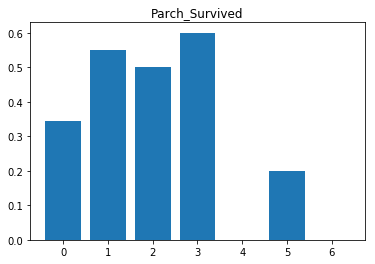

In [13]:
parch_survived = train_dataset[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()
print(parch_survived.sort_values(by='Survived', ascending=False))
plt.bar(parch_survived['Parch'], parch_survived['Survived'])
plt.title("Parch_Survived")
plt.xticks(range(len(parch_survived['Parch'])), parch_survived['Parch'])
plt.savefig(directory+"/Parch_Survived")
plt.show()
plt.clf()

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


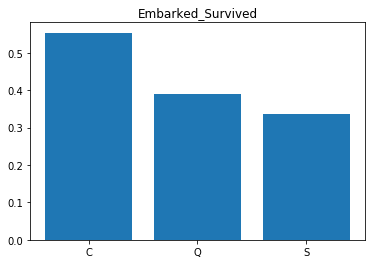

In [14]:
embarked_survived = train_dataset[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()
print(embarked_survived.sort_values(by='Survived', ascending=False))
plt.bar(embarked_survived['Embarked'], embarked_survived['Survived'])
plt.title("Embarked_Survived")
plt.xticks(range(len(embarked_survived['Embarked'])), embarked_survived['Embarked'])
plt.savefig(directory+"/Embarked_Survived")
plt.show()
plt.clf()

# Feature Engineering

In [15]:
print("--------Feature Engineering------")
test_passenger_id = test_dataset['PassengerId']
survived = train_dataset["Survived"]
train_dataset = train_dataset.drop("Survived",axis=1)

print("Missing values in both data sets:")
nans = pd.concat([train_dataset.isnull().sum(), test_dataset.isnull().sum()],
                 axis=1,
                 keys=['Training Set', 'Test Set'])
print(nans[nans.sum(axis=1)>0].astype(int))

--------Feature Engineering------
Missing values in both data sets:
          Training Set  Test Set
Age                177        86
Fare                 0         1
Cabin              687       327
Embarked             2         0


In [16]:
test_dataset[test_dataset['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [17]:
pclass2fare_train = train_dataset[["Pclass", "Fare"]].groupby(['Pclass'], as_index=False).mean()
find_fare_train = pclass2fare_train[pclass2fare_train["Pclass"] == 3]['Fare'].values[0]
pclass2fare_test = test_dataset[["Pclass", "Fare"]].groupby(['Pclass'], as_index=False).mean()
find_fare_test = pclass2fare_test[pclass2fare_test["Pclass"] == 3]['Fare'].values[0]
find_fare = (find_fare_train + find_fare_test)/2
test_dataset["Fare"].fillna(find_fare, inplace=True)

In [18]:
titles = list(set(train_dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False).unique().tolist() + test_dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False).unique().tolist()))

titles_train = train_dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()
titles_test = test_dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

In [19]:
pd.concat([titles_train,titles_test], axis = 1).fillna(0).astype(int)

,Name,Name
Capt,1,0
Col,2,2
Countess,1,0
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,1,0
Major,2,0
Master,40,21


In [20]:
title_mapping = {k: "Rare" if k in ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
                 else "Miss" if k in ['Mlle', 'Ms']
                 else "Mrs" if k == "Mme"
                 else k
                 for k in titles}
title_mapping2 = {"Mr": 1, "Rare" : 2, "Master": 3, "Miss": 4, "Mrs": 5}
for dataset in [train_dataset, test_dataset]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].map(title_mapping2)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)
train_dataset = train_dataset.drop("Name", axis = 1)
test_dataset = test_dataset.drop("Name", axis = 1)

In [21]:
train_dataset[train_dataset["Embarked"].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,female,38.0,0,0,113572,80.0,B28,NaN,4
829,830,1,female,62.0,0,0,113572,80.0,B28,NaN,5


In [22]:
train_dataset["Embarked"].fillna('S', inplace=True)

In [23]:
def create_labels(feature, train_dataset = train_dataset, test_dataset = test_dataset):
    encoder = LabelEncoder()
    train_dataset[feature] = encoder.fit_transform(train_dataset[feature].astype(str))
    test_dataset[feature] = encoder.transform(test_dataset[feature].astype(str))
    categorical_labels_embarked_train = to_categorical(train_dataset[feature], num_classes=encoder.classes_.shape[0])
    categorical_labels_embarked_test = to_categorical(test_dataset[feature], num_classes=encoder.classes_.shape[0])
    embarked_train = pd.DataFrame(data = categorical_labels_embarked_train, columns = encoder.classes_)
    embarked_test = pd.DataFrame(data = categorical_labels_embarked_test, columns = encoder.classes_)
    train_dataset = train_dataset.drop(feature, axis = 1)
    test_dataset = test_dataset.drop(feature, axis = 1)
    train_dataset = pd.concat([train_dataset, embarked_train], axis=1)
    test_dataset = pd.concat([test_dataset, embarked_test], axis=1)
    return train_dataset, test_dataset   

In [24]:
train_dataset, test_dataset = create_labels("Embarked")
train_dataset['Sex'] = train_dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_dataset['Sex'] = test_dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_dataset['Cabin'] = train_dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_dataset['Cabin'] = test_dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [25]:
del train_dataset['Ticket'], test_dataset['Ticket'], train_dataset['PassengerId'], test_dataset['PassengerId']

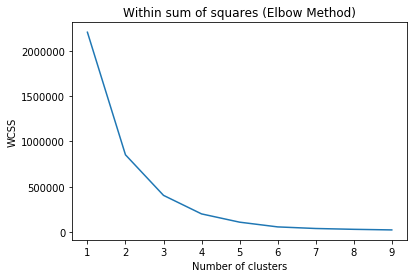

In [26]:
wcss = []
X_train_group = train_dataset.drop("Age", axis = 1).as_matrix()
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_train_group)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title("Within sum of squares (Elbow Method)")
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.savefig(directory+"/Clusters")
plt.show()
plt.clf()

In [27]:
clusters = int(input("Insert the optimal number of clusters: "))

Insert the optimal number of clusters: 4


In [28]:
kmeans = KMeans(n_clusters = clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_train = kmeans.fit_predict(X_train_group)
X_test_group = test_dataset.drop("Age", axis = 1).as_matrix()
y_kmeans_test = kmeans.predict(X_test_group)

group_train = pd.DataFrame(data = y_kmeans_train,
                            columns = ["Group"])
group_test = pd.DataFrame(data = y_kmeans_test,
                           columns = ["Group"])
train_dataset = pd.concat([train_dataset, group_train], axis=1)
test_dataset = pd.concat([test_dataset, group_test], axis=1)
train_age = train_dataset[["Group", "Age"]].groupby(['Group']).agg([np.nanmean, np.nanstd])
test_age = test_dataset[["Group", "Age"]].groupby(['Group']).agg([np.nanmean, np.nanstd])
train_random_ages = list()
for i in range(clusters):
    if train_dataset[(train_dataset["Age"].isnull()) & (train_dataset["Group"] == i)].shape[0] == 0:
        train_random_ages.append(list())
    else:
        train_random_ages.append(np.random.randint(train_age.iloc[i,0] - train_age.iloc[i,1],
                                train_age.iloc[i,0] + train_age.iloc[i,1],
                                size = train_dataset[(train_dataset["Age"].isnull()) & (train_dataset["Group"] == i)].shape[0]))
test_random_ages = list()
for i in range(4):
    if test_dataset[(test_dataset["Age"].isnull()) & (test_dataset["Group"] == i)].shape[0] == 0:
        test_random_ages.append(list())
    else:
        test_random_ages.append(np.random.randint(test_age.iloc[i,0] - test_age.iloc[i,1],
                                test_age.iloc[i,0] + test_age.iloc[i,1],
                                size = test_dataset[(test_dataset["Age"].isnull()) & (test_dataset["Group"] == i)].shape[0]))  
        
for i in range(clusters):
    if len(train_random_ages[i]) == 0:
        pass
    else:
        train_dataset.loc[(train_dataset["Age"].isnull()) & (train_dataset["Group"] == i),"Age"] = train_random_ages[i]
for i in range(4):
    if len(test_random_ages[i]) == 0:
        pass
    else:
        test_dataset.loc[(test_dataset["Age"].isnull()) & (test_dataset["Group"] == i),"Age"] = test_random_ages[i]


nans2 = pd.concat([train_dataset.isnull().sum(), test_dataset.isnull().sum()],
                 axis=1,
                 keys=['Training Set', 'Test Set'])

In [29]:
for dataset in [train_dataset, test_dataset]:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [30]:
def make_labels(feature, name, train_dataset = train_dataset, test_dataset = test_dataset):
    label_binarizer = LabelBinarizer()
    pclass_train = pd.DataFrame(data = label_binarizer.fit_transform(train_dataset[feature]),
                                columns = [name + " " + str(x) for x in label_binarizer.classes_])
    pclass_test = pd.DataFrame(data = label_binarizer.transform(test_dataset[feature]),
                               columns = [name + " " + str(x) for x in label_binarizer.classes_])
    train_dataset = train_dataset.drop(feature, axis = 1)
    test_dataset = test_dataset.drop(feature, axis = 1)
    train_dataset = pd.concat([train_dataset, pclass_train], axis=1)
    test_dataset = pd.concat([test_dataset, pclass_test], axis=1)  
    return train_dataset, test_dataset

In [31]:
for i,j in zip(["Pclass", "Title"], ["Class", "Title"]):
    train_dataset, test_dataset = make_labels(i,j)

In [32]:
del train_dataset["Group"], test_dataset["Group"]

In [33]:
nans2[nans2.sum(axis=1)>0].astype(int)

,Training Set,Test Set


In [34]:
train_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S,Age*Class,Title 1,Title 2,Title 3,Title 4,Title 5
0,3,0,22.0,1,0,7.2500,0,0.0,0.0,1.0,66.0,1,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,1.0,0.0,0.0,38.0,0,0,0,0,1
2,3,1,26.0,0,0,7.9250,0,0.0,0.0,1.0,78.0,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,1,0.0,0.0,1.0,35.0,0,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0.0,0.0,1.0,105.0,1,0,0,0,0


# Implementation of Classification Algorithms

In [35]:
print("--------Implementation of Classification Algorithms----")

--------Implementation of Classification Algorithms----


In [36]:
Y_train = survived.values
train = train_dataset.values
test = test_dataset.values

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(train)
X_test = sc.transform(test)

In [38]:
print("--------Split training set into two sets for evaluation--------")
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

--------Split training set into two sets for evaluation--------


In [39]:
def prediction(classifier, x_train = x_train, y_train = y_train, x_test = x_test):
    classifier.fit(x_train, y_train)
    return classifier.predict(x_test)

def crossvalscore(estimator, x_train = x_train, y_train = y_train):
    accuracies = cross_val_score(estimator, X = x_train, y = y_train, cv = 10)
    return accuracies.mean()

def auc(classifier, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test):
    return roc_auc_score(y_test, prediction(classifier))

def g_s(estimator, parameters, x_train = x_train, y_train = y_train):
    grid_search = GridSearchCV(estimator = estimator,
                              param_grid = parameters,
                              scoring = 'accuracy',
                              cv = 10,
                              n_jobs = -1)
    grid_search.fit(x_train, y_train)
    return grid_search.best_params_

In [40]:
print("-----------Set the parameters for Grid Search------------")
parameters_svm = [{'C' : [0.1, 1, 10, 100], 'kernel' : ['rbf'], 'gamma' : [0.1, 0.01, 0.001, 0.0001], 'random_state' : [0], "tol" : [0.1, 0.01, 0.001, 0.0001]}]
parameters_rf = [{'n_estimators' : [50, 100, 150, 200, 300, 400, 500, 600, 700, 800], 'criterion': ['entropy', "gini"], 'random_state' : [0]}]
parameters_knn = [{'n_neighbors' : [2, 5, 10, 25, 50, 100, 200, 400], 'metric' : ['minkowski'], 'p': [1,2], "n_jobs" : [-1]}]
parameters_xgb = [{'max_depth' : [1,2,3,4,5], 'learning_rate' : [0.1,0.01,0.001], 'n_estimators' : [100, 150, 175, 180, 200]}]
parameters_lr = [{'penalty' : ['l1', 'l2'], "tol" : [0.001, 0.0001, 0.00001], "C" : [0.1, 1, 10], "class_weight" : [None, "balanced"], "random_state" : [0], "n_jobs" : [-1]}]

-----------Set the parameters for Grid Search------------


In [41]:
print("-------------Set optimal values to the Classfiers----------")
classifier_rf = RandomForestClassifier(**g_s(RandomForestClassifier(), parameters_rf))
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_rbf = SVC(**g_s(SVC(kernel = 'rbf'), parameters_svm))
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_nb = GaussianNB()
classifier_knn = KNeighborsClassifier(**g_s(KNeighborsClassifier(), parameters_knn))
classifier_lr = LogisticRegression(**g_s(LogisticRegression(), parameters_lr))
classifier_xgb = XGBClassifier(**g_s(XGBClassifier(), parameters_xgb))

-------------Set optimal values to the Classfiers----------


In [42]:
def ann(x_train = x_train, y_train = y_train):
    classifier = Sequential()
    o = x_train.shape[1] //2
    classifier.add(Dense(output_dim = o, init = 'uniform', activation = 'tanh', input_dim = x_train.shape[1]))
    while o > 2:
        o = o//2
        classifier.add(Dense(output_dim = o, init = 'uniform', activation = 'tanh'))
        classifier.add(Dense(output_dim = o, init = 'uniform', activation = 'tanh'))
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier_ann = ann()

In [43]:
def pred_ann_train(x_train = x_train, y_train = y_train, x_test = x_test):
    ann_class = ann()
    ann_class.fit(x_train, y_train, epochs=150, batch_size=30,verbose = 0)
    y_pred_ann = ann_class.predict(x_test)
    y_pred_ann = np.array([1 if y >= 0.5 else 0 for y in y_pred_ann])
    return y_pred_ann
y_pred_ann = pred_ann_train()

In [44]:
model = KerasClassifier(build_fn=ann, epochs=80, batch_size=30, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
ann_results = cross_val_score(model, x_train, y_train, scoring="accuracy", cv=kfold).mean()

In [45]:
algorithms = {'Kernel_SVM' : classifier_rbf,
             'Random Forest' : classifier_rf,
             'SVM' : classifier_svm,
             'Decision_Tree' : classifier_dt,
             'Naive_Bayes' : classifier_nb,
             'KNN' : classifier_knn,
             'Logistic_Regression' : classifier_lr,
             'XGBoost' : classifier_xgb}

In [46]:
results = pd.DataFrame(data = OrderedDict([("Cross Val Score" , list(map(lambda x: round(crossvalscore(x),2),algorithms.values()))),
                                            ("AUC" , list(map(lambda x: round(auc(x),2),algorithms.values()))),
                                             ("Accuracy" , list(map(lambda x : round(accuracy_score(y_test, prediction(x)),2), algorithms.values()))),
                                             ("F1 Score" , list(map(lambda x : round(f1_score(y_test, prediction(x)),2), algorithms.values())))
                                                            ]),
                        index = algorithms.keys())
res_ann = pd.DataFrame(data = OrderedDict([("Cross Val Score", round(ann_results,2)),
                                            ("AUC" , round(roc_auc_score(y_test,y_pred_ann),2)),
                                            ("Accuracy" , round(accuracy_score(y_test,y_pred_ann),2)),
                                             ("F1 Score" , round(f1_score(y_test,y_pred_ann),2))
                                            ]),
                        index = ["Artificial_Neural_Network"])
results = results.append(res_ann)
results

,Cross Val Score,AUC,Accuracy,F1 Score
Kernel_SVM,0.84,0.80,0.81,0.75
Random Forest,0.80,0.81,0.83,0.77
SVM,0.83,0.81,0.82,0.76
Decision_Tree,0.77,0.77,0.79,0.72
Naive_Bayes,0.80,0.80,0.79,0.76
KNN,0.82,0.79,0.80,0.74
Logistic_Regression,0.83,0.81,0.82,0.77
XGBoost,0.83,0.80,0.81,0.75
Artificial_Neural_Network,0.82,0.78,0.81,0.73


In [47]:
directory_results = "./results"
if not os.path.exists(directory_results):
    os.makedirs(directory_results)

for name,classifier in algorithms.items():
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    submission = pd.DataFrame({
        "PassengerId": test_passenger_id,
        "Survived": Y_pred
    })
    submission.to_csv(directory_results + '/' + name + '.csv', index=False)
    print("Exported results of " + name + " algorithm")

ann_class = ann()
ann_class.fit(X_train, Y_train, epochs=150, batch_size=30, verbose = 0)
Y_pred_ann = ann_class.predict(X_test)
Y_pred_ann = [1 if y >= 0.5 else 0 for y in Y_pred_ann]
submission = pd.DataFrame({
        "PassengerId": test_passenger_id,
        "Survived": Y_pred_ann
    })
submission.to_csv(directory_results + '/Artificial_Neural_Network.csv', index=False)
print("Exported results of Artificial_Neural_Network algorithm")

Exported results of Kernel_SVM algorithm
Exported results of Random Forest algorithm
Exported results of SVM algorithm
Exported results of Decision_Tree algorithm
Exported results of Naive_Bayes algorithm
Exported results of KNN algorithm
Exported results of Logistic_Regression algorithm
Exported results of XGBoost algorithm
Exported results of Artificial_Neural_Network algorithm
